# Clasificación

In [1]:
# librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

## Modelos de clasificación

Empleando el dataset de peces, clasificaremos las especies por sus características. Iniciaremos por contar cuantos peces hay de cada especie en el dataset para poder entender cómo crear el modelo. No se profundizará en el análisis exploratorio ya que ha sido desarrollado en anteriores ejemplos/ejercicios.

In [2]:
# TO-DO: cargar el dataset de peces "Fish.csv"
df=pd.read_csv("/content/Fish.csv")

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


([<matplotlib.patches.Wedge at 0x7fe49b27c220>,
 [Text(0.4925997893879059, 0.9835372120540183, 'Perch'),
  Text(-1.0692251924802005, 0.25837470419078984, 'Bream'),
  Text(-0.7263011784050116, -0.8261274709434928, 'Roach'),
  Text(0.010866933463401687, -1.0999463213071363, 'Pike'),
  Text(0.6412773934759526, -0.8937355898791814, 'Smelt'),
  Text(0.9883556249116893, -0.4828593570652063, 'Parkki'),
  Text(1.092279199294596, -0.1301005410763399, 'Whitefish')],
 [Text(0.268690794211585, 0.5364748429385554, '35'),
  Text(-0.5832137413528367, 0.1409316568313399, '22'),
  Text(-0.39616427913000635, -0.45061498415099605, '13'),
  Text(0.005927418252764556, -0.5999707207129834, '11'),
  Text(0.3497876691687014, -0.4874921399340989, ' 9'),
  Text(0.5391030681336486, -0.2633778311264761, ' 7'),
  Text(0.5957886541606886, -0.07096393149618539, ' 4')])

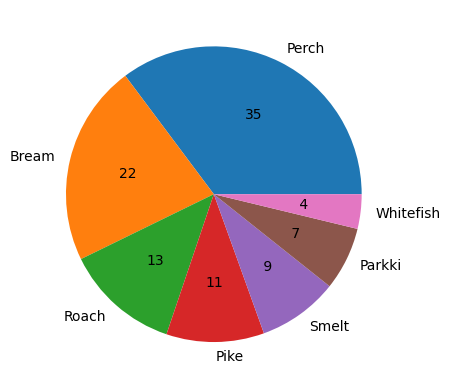

In [4]:
# revisando cuantos valores hay por cada especie
counts = df["Species"].value_counts()
plt.pie(counts, labels=list(counts.index), autopct="%2.f" )

Ya que hay especies con muy poca representación en el dataset, como son __Whitefish__, __parkki__, __smelt__ y __pike__ haremos un modelo basado en las especies __Roach__, __Bream__ y __Perch__

In [5]:
especies_eliminar = ["Whitefish", "Parkki", "Smelt", "Pike"]
df2 = df.copy()
for especie in especies_eliminar:
    df2 = df2.drop(df[df["Species"] == especie].index)

df2["Species"].unique()

array(['Bream', 'Roach', 'Perch'], dtype=object)

In [6]:
knn_clf = KNeighborsClassifier()

In [7]:
# reemplazar los nombres de las categorías por números para el clasificador
df3 = df2.copy()
df3["Species"] = df3["Species"].replace({"Bream": 0, "Roach": 1, "Perch": 2})
df3.head()



,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [8]:
y = df3["Species"]
X = df3.drop("Species", axis=1)
print(f"tam X: {X.shape}")
print(f"tam y: {y.shape}")

tam X: (111, 6)
tam y: (111,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
print(f"tam X: {X_train.shape}")
print(f"tam y: {y_train.shape}")
print(f"tam X_test: {X_test.shape}")
print(f"tam y_test: {y_test.shape}")

tam X: (66, 6)
tam y: (66,)
tam X_test: (45, 6)
tam y_test: (45,)


In [10]:
# Entrenando el modelo
knn_clf.fit(X=X_train, y=y_train)

KNeighborsClassifier()

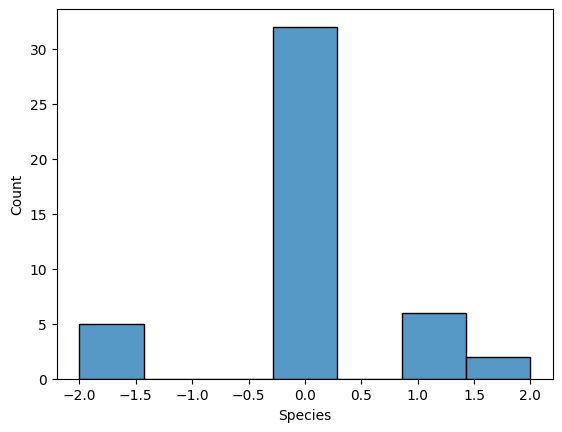

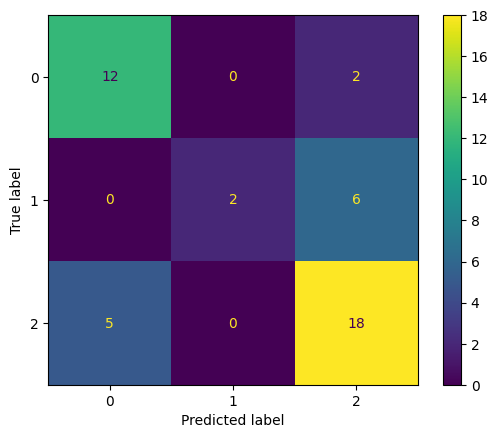

In [11]:
#Evaluando el modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
predicciones = knn_clf.predict(X_test)
diferencias = predicciones - y_test
sns.histplot(diferencias)
cm = confusion_matrix(y_test, predicciones)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_clf.classes_)
disp.plot()
plt.show()



In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

           0       0.71      0.86      0.77        14
           1       1.00      0.25      0.40         8
           2       0.69      0.78      0.73        23

    accuracy                           0.71        45
   macro avg       0.80      0.63      0.64        45
weighted avg       0.75      0.71      0.69        45



## Conclusiones del ejercicio de clasificación
Se ha entrenado un modelo, el cual toma las características del dataset y permite clasificar la salida en uno de tres especies de entrada. Si bien el modelo no es muy preciso (dependiendo de la ejecución, podría rondar el 70% de precisión para dos o las tres clases) el problema en general es que el muestreo aleatorio no tiene en cuenta dejar peces de la clase minoritaria en el dataset de entrenamiento, con lo que el modelo estará sesgado. En este caso se requieren mejores datos o el ajuste del método de muestreo para que cada clase tenga representación apropiada en el dataset de entrenamiento